# Logistic Regression

We use a classification model to predict which customers will default on their credit card debt. 

## Data

To learn more about the data and all of the data preparation steps, take a look at [this page](/docs/data-credit.ipynb). Here, we simply import a Python script which includes all of the necessary steps.

In [1]:
from data_prep_credit import * 

## Model

In [2]:
import sklearn.linear_model as skl_lm

clf = skl_lm.LogisticRegression()
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [3]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.968

### Confusion matrix

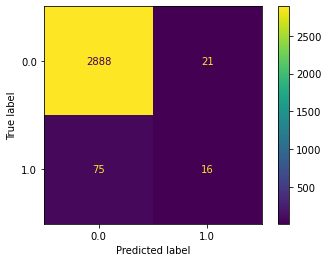

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### Classification report

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      2909
         Yes       0.43      0.18      0.25        91

    accuracy                           0.97      3000
   macro avg       0.70      0.58      0.62      3000
weighted avg       0.96      0.97      0.96      3000



### Change threshold

Use specific threshold

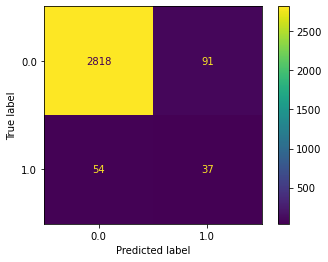

In [6]:
pred_proba = clf.predict_proba(X_test)

df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .25})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()


### Classification report

In [7]:

print(classification_report(y_test, df_['y_pred']))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2909
         1.0       0.29      0.41      0.34        91

    accuracy                           0.95      3000
   macro avg       0.64      0.69      0.66      3000
weighted avg       0.96      0.95      0.96      3000

